In [35]:
import pandas as pd
import math as m


def calculate_phi(px, py):
    return m.atan2(py,px)

def calculate_theta(px, py, pz):
    return m.atan2(m.sqrt(px**2 + py**2), pz)

def calculate_eta(px, py, pz):
    theta = calculate_theta(px, py, pz)
    return -1. * m.log(m.tan(theta/2))

def dR(x1,y1,z1, x2,y2,z2):
    phi1 = calculate_phi(x1,y1)
    eta1 = calculate_eta(x1,y1,z1)
    phi2 = calculate_phi(x2,y2)
    eta2 = calculate_eta(x2,y2,z2)
    dphi = phi1 - phi2
    #dphi = if |dphi| > m.pi: dphi -= 2*m.pi
    deta = eta1 - eta2
    return m.sqrt(dphi**2 + deta**2)

sample = pd.read_csv(
    "/Users/i550012/study/heptopics/hepytorch/examples/data/toymc/ttbar_1_30ll_test.csv"
)
col = ["bpx","bpy","bpz","bmass", "abpx","abpy","abpz","abmass", "j_1px", "j_1py", "j_1pz", "j_1mass", "j_2px", "j_2py", "j_2pz", "j_2mass"]
df = sample[col]

# adding new columns for the angle phi
df = df.assign(dR1=df.apply(lambda x: dR(x["bpx"], x["bpy"], x["bpz"], x["j_1px"], x["j_1py"], x["j_1pz"]), axis=1))
df = df.assign(dR1x2=df.apply(lambda x: dR(x["bpx"], x["bpy"], x["bpz"], x["j_2px"], x["j_2py"], x["j_2pz"]), axis=1))
df = df.assign(dR2=df.apply(lambda x: dR(x["abpx"], x["abpy"], x["abpz"], x["j_2px"], x["j_2py"], x["j_2pz"]), axis=1))
df = df.assign(dR2x1=df.apply(lambda x: dR(x["abpx"], x["abpy"], x["abpz"], x["j_1px"], x["j_1py"], x["j_1pz"]), axis=1))


Text(0.5, 1.0, 'dR2x1')

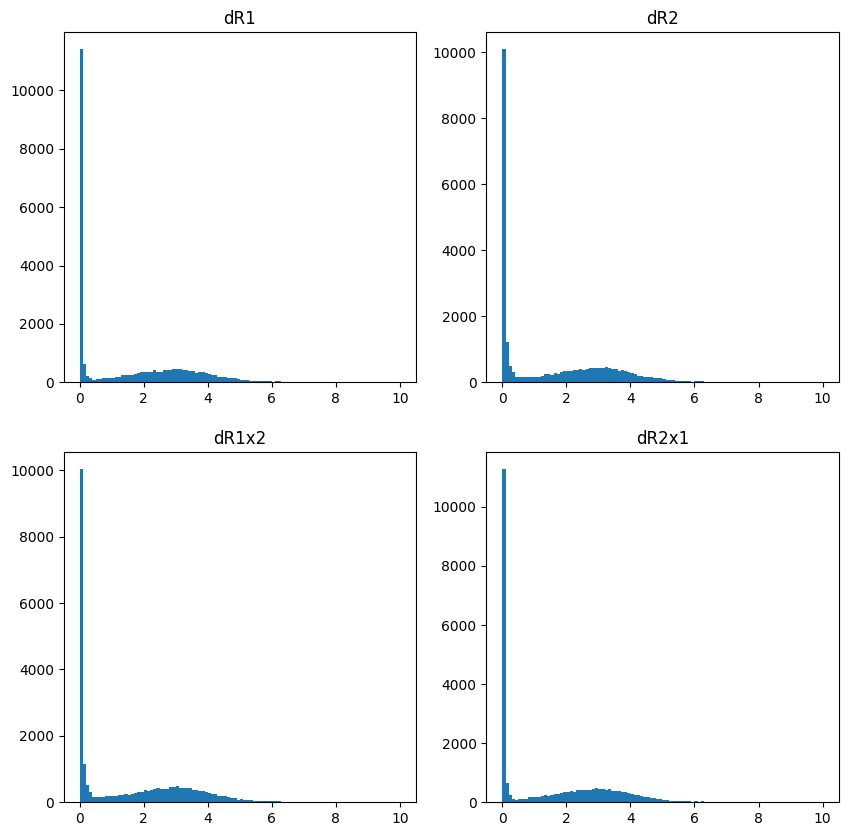

In [36]:
# draw the histogram of dR1, dR2, dR1x2, and dR2x1
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(df["dR1"], bins=100, range=(0, 10))
axs[0, 0].set_title("dR1")
axs[0, 1].hist(df["dR2"], bins=100, range=(0, 10))
axs[0, 1].set_title("dR2")
axs[1, 0].hist(df["dR1x2"], bins=100, range=(0, 10))
axs[1, 0].set_title("dR1x2")
axs[1, 1].hist(df["dR2x1"], bins=100, range=(0, 10))
axs[1, 1].set_title("dR2x1")


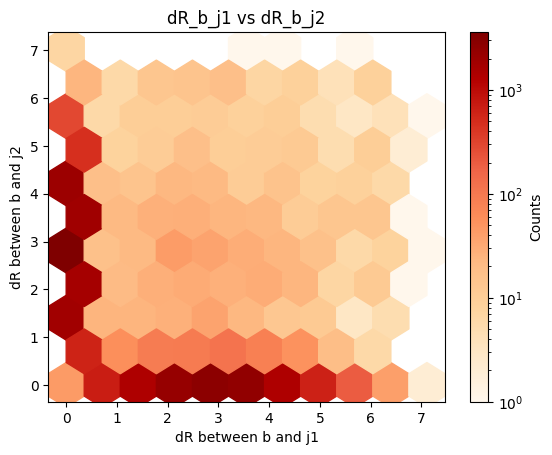

In [70]:
# draw scatter plot of dR1 vs dR1x2 with density in log scale
fig, ax = plt.subplots()
hb = ax.hexbin(df["dR1"], df["dR1x2"], gridsize=10, cmap='OrRd', bins='log')
ax.set_title("dR_b_j1 vs dR_b_j2")
ax.set_xlabel("dR between b and j1")
ax.set_ylabel("dR between b and j2")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Counts')
plt.show()



In [58]:
# count the number of events with dR1 < 0.4 or dR1x2 < 0.4
print("Number of events with dR1 < 0.4 or dR1x2 < 0.4: ", len(df[(df["dR1"] < 0.4) | (df["dR1x2"] < 0.4)]))
df_odd = df[( (df["dR1"] >= 0.4) & (df["dR1x2"] >= 0.4))]


Number of events with dR1 < 0.4 or dR1x2 < 0.4:  24362


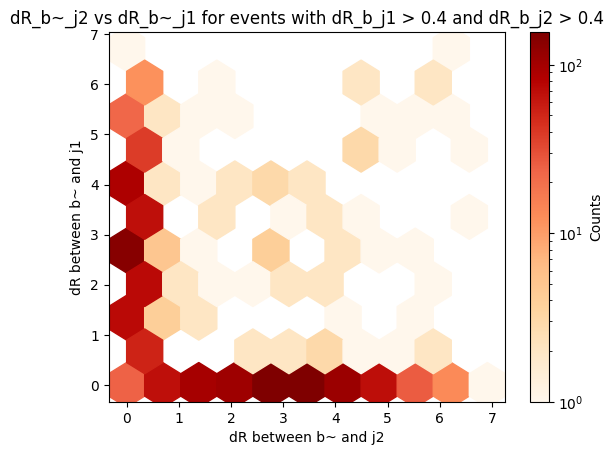

In [71]:

fig, ax = plt.subplots()
hb = ax.hexbin(df_odd["dR2"], df_odd["dR2x1"], gridsize=10, cmap="OrRd", bins="log")
ax.set_title("dR_b~_j2 vs dR_b~_j1 for events with dR_b_j1 > 0.4 and dR_b_j2 > 0.4")
ax.set_xlabel("dR between b~ and j2")
ax.set_ylabel("dR between b~ and j1")
cb = fig.colorbar(hb, ax=ax)
cb.set_label("Counts")
plt.show()

In [65]:
# count the number of events with dR2 < 0.4 or dR2x1 < 0.4
print("Number of events with dR2 < 0.4 or dR2x1 < 0.4: ", len(df_odd[(df_odd["dR2"] < 0.4) | (df_odd["dR2x1"] < 0.4)]))
print(len(df_odd))

Number of events with dR2 < 0.4 or dR2x1 < 0.4:  1399
1473


In [3]:
import hepytorch as hep

myHEP = hep.HEPTorch('./recipes/jet_matcher.json')

In [4]:
result = myHEP.train()

epoch 0, Accuracy: 0.4979631304740906, Loss: 0.6914663314819336
epoch 1, Accuracy: 0.4929195046424866, Loss: 0.6943961381912231
epoch 2, Accuracy: 0.49505335092544556, Loss: 0.6894930005073547
epoch 3, Accuracy: 0.4981571435928345, Loss: 0.6972111463546753
epoch 4, Accuracy: 0.49466538429260254, Loss: 0.6953154802322388
epoch 5, Accuracy: 0.4960232675075531, Loss: 0.6938018798828125
epoch 6, Accuracy: 0.49000969529151917, Loss: 0.6897314190864563
epoch 7, Accuracy: 0.48729389905929565, Loss: 0.68659508228302
epoch 8, Accuracy: 0.4935014545917511, Loss: 0.6861992478370667
epoch 9, Accuracy: 0.4884577989578247, Loss: 0.6899682283401489
epoch 10, Accuracy: 0.4903976619243622, Loss: 0.6940044164657593
epoch 11, Accuracy: 0.4905916452407837, Loss: 0.6976303458213806
epoch 12, Accuracy: 0.4902036786079407, Loss: 0.6997684836387634
epoch 13, Accuracy: 0.4882638156414032, Loss: 0.7015033960342407
epoch 14, Accuracy: 0.4911736249923706, Loss: 0.6959482431411743
epoch 15, Accuracy: 0.49350145459

In [30]:
import pandas as pd
import torch

sample = pd.read_csv(
    "/Users/i550012/study/heptopics/hepytorch/examples/data/toymc/ttbar_powheg_pythia_CP5_delphes_1_30emu.csv"
)
col = [ "j_1px", "j_1py", "j_1pz", "j_1mass", "l_1px", "l_1py", "l_1pz", "l_1mass", "j_2px", "j_2py", "j_2pz", "j_2mass", "l_2px", "l_2py", "l_2pz", "l_2mass", "mex", "mey" ]
observable = sample[col]
X = torch.tensor(observable.values).type(torch.float)
y_pred = myHEP.model(X)
print(1.0 - y_pred.round().sum() / y_pred.shape[0])

tensor(0.9352, grad_fn=<RsubBackward1>)


In [31]:
y_pred.shape

torch.Size([119993, 1])